# Lab Assignment 2

In the third assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning () repository on Github.

### Deadline October 26th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Scikit-learn has the dataset built in. The dataset contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the following cell shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
[[0 1 2 3 4]
 [5 6 7 8 9]]


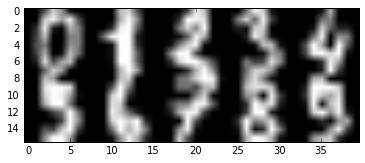

In [3]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('on')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print "The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10]))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. Also pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner.

Plot how your score on the test set improves over time. My best score was about 85% correct!

Make sure to comment your code.

In [4]:
#Make a prediction function h
def prediction_function(x,theta):
    return 1.0 / (1.0 + np.exp(-np.dot(theta.T,x)))

In [5]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):
    cost = -(1.0 / len(x_predict)) * sum(np.dot(y.T,log(x_predict)) + np.dot((1-y.T),log(1 - x_predict)))
    return cost

In [6]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
    grad = (1.0 / len(x)) * np.outer((x_predict - y),x)                               
    return grad
    

The score of the algorithm on the test set is:  86.8686868687 %
The final cost of the algorithm is 0.0160315781384


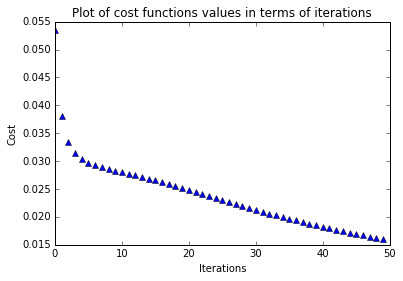

In [75]:
#Choose a suitable learning rate
alpha = 0.03
iterations = 50
theta = np.zeros((64,10))

#It is important to check that you're not overfitting by testing your prediction on a testset
x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))

target = digits.target[:1500]
target_test = digits.target[1500:]

cost_values = []
for i in range(iterations):
    for j in range(x.shape[0]):
        x_predict = prediction_function(x[j,:],theta)
        y = np.zeros(10)
        y[target[j]] = 1
        theta = theta - alpha * compute_gradient(x_predict,y,x[j,:]).T
    cost_values.append(cost_function(x_predict, y))
    
    score = []
    for k in range(x_test.shape[0]):
        x_predict_test = prediction_function(x_test[k,:], theta)
        if argmax(x_predict_test) == target_test[k]:
            score.append(1)
        else:
            score.append(0)
            
    score_new = float(sum(score)) / float(x_test.shape[0])*100
    
    if accuracy_new < accuracy_old:
        print "Error: the accuracy hasn't increased during this iteration. Forced to stop to avoid overfitting."
        break
    score_old = score_new
    
print "The score of the algorithm on the test set is: ", score_new, "%"
print "The final cost of the algorithm is", cost_function(x_predict, y)

plt.plot(range(iterations),cost_values, '^')
plt.title('Plot of cost functions values in terms of iterations')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

In [25]:
if accuracy_new < accuracy_old:
    print "Error: the accuracy hasn't increased during this iteration. forced to step"
    #break
    accuracy_old = accuracy_new

The accuracy of the algorithm on the test set is 86.8686868687 %
The final cost of the algorithm is 0.0160315781384


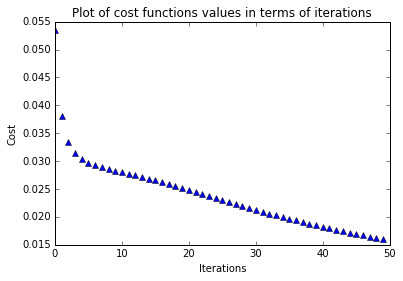

In [71]:
#Choose a suitable learning rate
alpha = 0.03
iterations = 50
theta = np.zeros((64,10))

#It is important to check that you're not overfitting by testing your prediction on a testset
x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))

target = digits.target[:1500]
target_test = digits.target[1500:]

prediction = []
cost_values = []
accuracy_old = 0
for i in range(iterations):
    for j in range(x.shape[0]):
        x_predict = prediction_function(x[j,:],theta)
        y = np.zeros(10)
        y[target[j]] = 1
        theta = theta - alpha * compute_gradient(x_predict,y,x[j,:]).T
    cost_values.append(cost_function(x_predict, y))
    
for k in range(x_test.shape[0]):
    x_predict_test = prediction_function(x_test[k,:], theta)
    if argmax(x_predict_test) == target_test[k]:
        prediction.append(1)
    else:
        prediction.append(0)

accuracy = float(sum(prediction)) / float(x_test.shape[0])

print "The accuracy of the algorithm on the test set is", accuracy*100, "%"
print "The final cost of the algorithm is", cost_function(x_predict, y)

plt.plot(range(iterations),cost_values, '^')
plt.title('Plot of cost functions values in terms of iterations')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()